### Real Time Prediction of Online Shoppers’ Purchasing Intention using Machine Learning


This project aims to predict the purchasing intention of online shoppers in real-time using machine learning techniques. By analyzing various features of user behavior on e-commerce websites, 
the model will provide insights into the likelihood of a user making a purchase, enabling targeted marketing and improved customer experience.



### Online Shoppers Purchasing Intention Dataset

#### Dataset Overview

This dataset was donated to the UCI Machine Learning Repository on August 30, 2018. It is designed to facilitate the prediction of online shopping behavior, distinguishing between sessions that resulted in a purchase and those that did not.

#### Composition of the Dataset

- **Total Sessions:** 12,330
- **Negative Class Samples (No Purchase):** 10,422 (84.5%)
- **Positive Class Samples (Purchase):** 1,908 (15.5%)

#### Characteristics

- **Type:** Multivariate
- **Subject Area:** Business
- **Tasks:** Classification, Clustering
- **Feature Types:** Integer, Real
- **Instances:** 12,330
- **Features:** 17
- **Missing Values:** No

#### Variables Description

| Variable Name                | Role      | Type        | Description | Units | Missing Values |
|------------------------------|-----------|-------------|-------------|-------|----------------|
| Administrative               | Feature   | Integer     |             |       | No             |
| Administrative_Duration      | Feature   | Real        |             |       | No             |
| Informational                | Feature   | Integer     |             |       | No             |
| Informational_Duration       | Feature   | Real        |             |       | No             |
| ProductRelated               | Feature   | Integer     |             |       | No             |
| ProductRelated_Duration      | Feature   | Real        |             |       | No             |
| BounceRates                  | Feature   | Real        |             |       | No             |
| ExitRates                    | Feature   | Real        |             |       | No             |
| PageValues                   | Feature   | Real        |             |       | No             |
| SpecialDay                   | Feature   | Integer     |             |       | No             |

- The 'Revenue' attribute is used as the class label for the sessions, indicating whether the session ended in a purchase.

#### Relevance for Machine Learning

The dataset includes a well-rounded set of features that are ideal for building machine learning models to predict user purchasing intentions on e-commerce websites. It is specially curated to avoid biases towards specific campaigns, special days, user profiles, or periods, thereby enhancing its applicability in creating generalized models.






### Import Necessary Libraries

This section imports all the essential libraries needed for data manipulation, analysis, and visualization. These libraries include:
- `pandas` for data manipulation and ingestion.
- `numpy` for numerical operations.
- `matplotlib.pyplot` for plotting graphs.
- `warnings` to control warning messages.

By importing these libraries at the start, we ensure that all necessary tools are available for subsequent analysis, enhancing the notebook's organization and readability.


In [64]:
# Import essential libraries
import pandas as pd               # for data manipulation
import numpy as np                # for numerical operations
import matplotlib.pyplot as plt   # for data visualization
import warnings                   # to manage warning messages

# Suppress future warnings, particularly those categorized as FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

### Loading the Dataset

In this section, we load the "Online Shoppers Purchasing Intention Dataset" from the UCI Machine Learning Repository. This dataset provides features related to online shopping behavior which will be used to predict whether a user ends up purchasing. Loading the data correctly is the first step in our analysis pipeline, allowing us to perform data manipulation and analysis tasks subsequently.


In [65]:
import pandas as pd  # Importing the pandas library for data manipulation

# URL of the dataset from the UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv"

# Loading the dataset into a pandas DataFrame
data = pd.read_csv(url)


### Preview of the Dataset

After loading the dataset, it is a good practice to preview the first few rows. This helps in getting a quick sense of the data's structure, the types of data each column holds, and how the data entries are represented. This initial observation can guide further data preprocessing and analysis.


In [66]:

# Display the first five rows of the dataset to preview data
data.head(5)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Descriptive Statistics and Data Structure

To further understand the dataset, we'll look at:
- **Descriptive Statistics:** These provide a quick overview of the mean, standard deviation, min, max, and quartile values for each numerical feature, helping to spot any initial outliers or errors in the data.
- **DataFrame Summary:** This includes the data types of each column, the number of non-null values, and memory usage, offering insights into data cleanliness and structure.
- **Data Types:** Explicitly listing the types of data for each feature to confirm data consistency and suitability for analysis.


In [69]:
# Get a concise summary of the DataFrame including non-null counts and data types
data.info()

# Display data types of all columns
data.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [70]:
# Display descriptive statistics for numerical columns
data.describe()



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### Data Cleaning

Before diving deeper into data analysis, it's essential to clean the dataset to ensure accurate results. The cleaning steps include:
1. **Handling Missing Values:** Identify and summarize missing values across different columns.
2. **Removing Duplicates:** Eliminate any duplicate rows to ensure the uniqueness of the data.
3. **Converting Data Types:** Modify data types to better reflect the content of the data. For example, converting months to a categorical type and ensuring boolean types are correct.
4. **Handling Infinite Values:** Replace infinite values with NaN to avoid errors in calculations.


In [71]:
# Summarize missing values in each column
data.isnull().sum()

# Remove duplicate rows from the dataset
data.drop_duplicates(inplace=True)

# Convert 'Month' to a categorical data type
data['Month'] = data['Month'].astype('category')

# Ensure 'Weekend' is of boolean type
data['Weekend'] = data['Weekend'].astype('bool')

# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)


In [72]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


### Visualization of Revenue Outcomes

This section visualizes the distribution of purchasing outcomes among sessions. By plotting the count of sessions that resulted in a purchase (`True`) against those that did not (`False`), we can better understand the proportion of successful transactions in the dataset. Visualizing this data helps in identifying how balanced or imbalanced the dataset is, which is crucial for setting up appropriate modeling strategies.


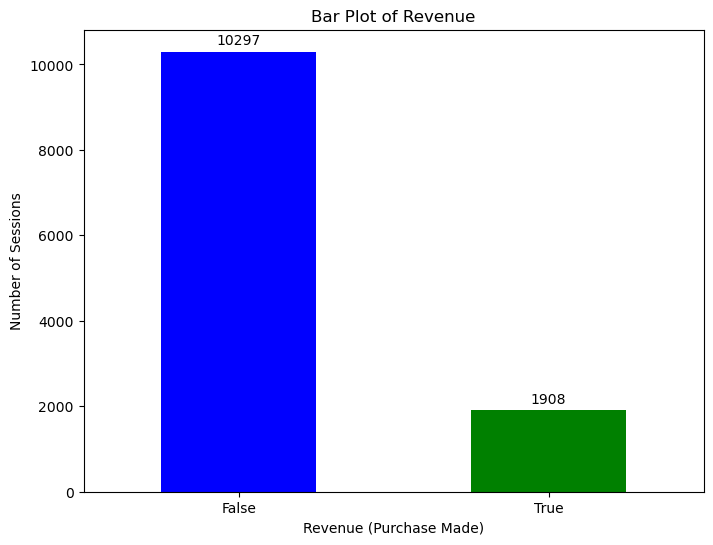

In [73]:
# Calculate the counts of each category in the 'Revenue' column
revenue_counts = data['Revenue'].value_counts()

# Set up the figure size for the plot
plt.figure(figsize=(8, 6))

# Create a bar plot with custom colors
bars = revenue_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Bar Plot of Revenue')  # Setting the title of the plot
plt.xlabel('Revenue (Purchase Made)')  # Label for the x-axis
plt.ylabel('Number of Sessions')  # Label for the y-axis
plt.xticks(rotation=0)  # Set x-axis labels to horizontal

# Loop through the bars in the plot and add text labels
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),  # Annotate bars with their heights
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Positioning the text
                 ha='center',  # Horizontally center the text
                 va='center',  # Vertically center the text
                 xytext=(0, 8),  # Offset text to be slightly above the bar
                 textcoords='offset points')

plt.show()  # Display the plot


### Bar Plot Analysis: Revenue Outcomes

The bar plot above illustrates the distribution of sessions based on whether a purchase was made (Revenue) on an e-commerce platform. This visualization is crucial for understanding the conversion rate effectiveness and identifying potential areas for improving the customer journey.

#### Key Observations:

- **Non-Purchase Sessions (Blue Bar):** The majority of the sessions, numbering 10,297, did not result in a purchase. This high number indicates that while many users visit the website, a significant portion leaves without making a transaction.
- **Purchase Sessions (Green Bar):** A smaller fraction of the sessions, exactly 1,908, ended with a purchase being made. This conversion rate might seem low, but it is typical for many e-commerce scenarios, where actual purchases can be a small percentage of total traffic.

#### Implications:

- **Focus on Conversion Rate Optimization (CRO):** The disparity between the number of non-purchase and purchase sessions suggests a potential to improve the site’s conversion rate. Strategies could include optimizing the website's user interface, enhancing the user experience, simplifying the checkout process, or targeting users with personalized offers.
- **Customer Behavior Insights:** Understanding the reasons behind the high number of non-purchases could provide actionable insights. For instance, are users abandoning carts at a high rate? If so, why? Analyzing the user journey in detail could reveal critical drop-off points.

This bar plot serves as a foundation for strategic discussions around marketing efforts, website design changes, and customer engagement strategies to boost revenue.


### Correlation Analysis

To understand the relationships between various numerical features in the dataset, we compute a correlation matrix. This matrix helps in identifying potential multicollinearity among features and the strength of the relationships. We then visualize this matrix using a heatmap, which provides a color-coded representation of the correlation coefficients. Features that are highly correlated might influence the model in similar ways, and this visualization aids in making decisions about feature selection or engineering.


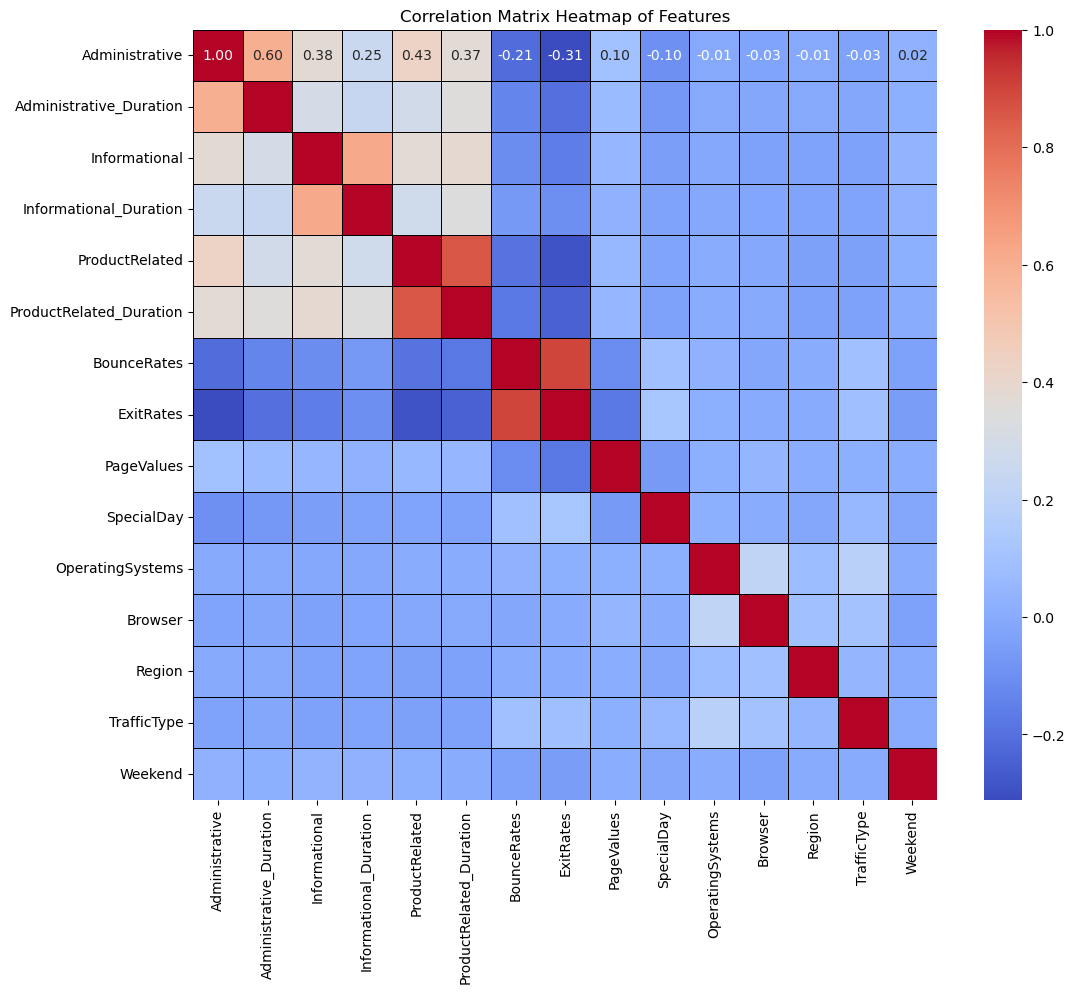

In [78]:
# Dropping non-numerical or target columns to focus on feature relationships
feature_data = data.drop(['Revenue', 'Month', 'VisitorType'], axis=1)

# Calculating the correlation matrix
correlation_matrix = feature_data.corr()

# Import necessary visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size for better visibility
plt.figure(figsize=(12, 10))

# Creating a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar=True, linewidths=0.5, linecolor='black')  # Adding aesthetic options
plt.title('Correlation Matrix Heatmap of Features')  # Setting the title of the heatmap
plt.show()  # Displaying the plot


### Interpretation of the Correlation Matrix Heatmap

The heatmap above provides a visual representation of the correlation coefficients between various features in our dataset.

#### Key Observations:
- **High Positive Correlation**: Features like 'Administrative' and 'Administrative_Duration' show a high positive correlation (0.60), indicating that sessions with more administrative activities tend to last longer.
- **Negative Correlation**: There is a notable negative correlation between 'BounceRates' and 'ExitRates' with 'PageValues' (-0.21 and -0.31, respectively), suggesting that sessions with higher bounce and exit rates tend to have lower page values.
- **Independent Features**: Features like 'Weekend' and various system-related features (e.g., 'OperatingSystems', 'Browser') show very low correlation with other features, indicating that they do not significantly influence other behavioral metrics in the dataset.

#### Usage:
- **Feature Selection for Modeling**: Understanding these correlations helps in feature selection for predictive modeling. For instance, highly correlated features might be redundant, and one of them could be omitted to reduce model complexity.
- **Insights for Business Strategy**: The negative correlation between 'PageValues' and 'ExitRates' suggests that improving user engagement on pages might lead to higher revenue potential, useful for business strategy adjustments.



### Dimensionality Reduction and Visualization Using PCA
The aim is to visualize the high-dimensional data in a two-dimensional space to observe any inherent clustering patterns that might correlate with the target variable 'Revenue'.

#### Steps Involved:
1. **Label Encoding**: Convert categorical variables into numerical format using Label Encoding, facilitating their use in machine learning models.
2. **Feature Standardization**: Standardize the feature set to ensure that the PCA isn't biased towards variables with higher variance.
3. **Applying PCA**: Reduce the dimensionality to two principal components to visualize the data.
4. **Visualization**: Plot the transformed features to examine potential clusters and their relation to the 'Revenue' variable.


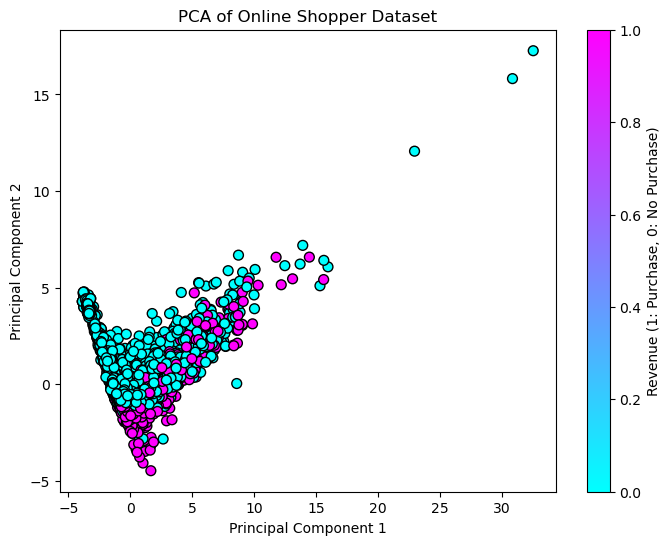

In [80]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Encode categorical variables using LabelEncoder
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Separate features and target
X = data.drop(['Revenue', 'Month', 'VisitorType'], axis=1)
y = data['Revenue']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=2, svd_solver='arpack')
X_pca = pca.fit_transform(X_scaled)

# Plot PCA results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='cool', edgecolor='k', s=50)
plt.title('PCA of Online Shopper Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Revenue (1: Purchase, 0: No Purchase)')
plt.show()


### Analysis of PCA Results on the Online Shopper Dataset

The scatter plot above shows the projection of the dataset onto the first two principal components identified by PCA. The color indicates whether a session resulted in a purchase (`Revenue = 1`) or not (`Revenue = 0`), with the color scale on the right.

#### Observations from the Plot:

- **Data Clustering**: The data points form a dense cluster with a tail stretching out to the right. This cluster might represent typical shopper behavior, with outliers possibly indicating different types of user interactions or special cases.
- **Color Gradient**: The color gradient from purple to teal suggests varying degrees of the likelihood of purchase across different sessions. Points closer to purple are more likely to have resulted in no purchase, whereas points closer to teal might indicate sessions that ended in purchases.
- **Component Analysis**:
  - **Principal Component 1 (Horizontal Axis)**: This component captures the most variance and may represent factors that heavily influence purchasing decisions. For instance, it could be capturing variations in user engagement metrics or session time.
  - **Principal Component 2 (Vertical Axis)**: This component captures the second most variance and might represent other aspects, such as the type of products viewed or the complexity of the navigation path within the site.

#### Implications for Business Strategy:

- **Targeted Interventions**: By understanding regions in the plot where purchases are more likely (teal areas), the e-commerce platform can tailor marketing strategies to convert sessions resembling these characteristics into purchases.
- **Customer Segmentation**: The different densities and distributions of data points can assist in segmenting customers into various groups based on their shopping behavior, enabling personalized marketing approaches.

This PCA visualization is instrumental in simplifying complex, high-dimensional data into understandable formats, allowing us to hypothesize about underlying patterns that govern shopper behavior on the platform.


### Comparative Visualization of t-SNE Projections Using Various Distance Metrics

This visualization explores the impact of different distance metrics on the t-SNE projection of the Online Shopper Dataset. Each subplot represents the t-SNE results using one of the specified metrics. This comparison is insightful for understanding how distance calculations influence the grouping and separation in high-dimensional data reduction.

#### Metrics Used:
- **Euclidean**: Standard distance metric in many applications.
- **Manhattan**: Sum of absolute differences, useful in grid-like path calculations.
- **Chebyshev**: Maximum distance along any coordinate dimension.
- **Minkowski**: Generalized form of Euclidean and Manhattan distances.
- **Hamming**: Measures the distance for categorical data.
- **Canberra**: Weighted version of Manhattan, sensitive to small changes near zero.
- **Bray-Curtis**: Based on the sum of absolute differences, often used in ecological data.




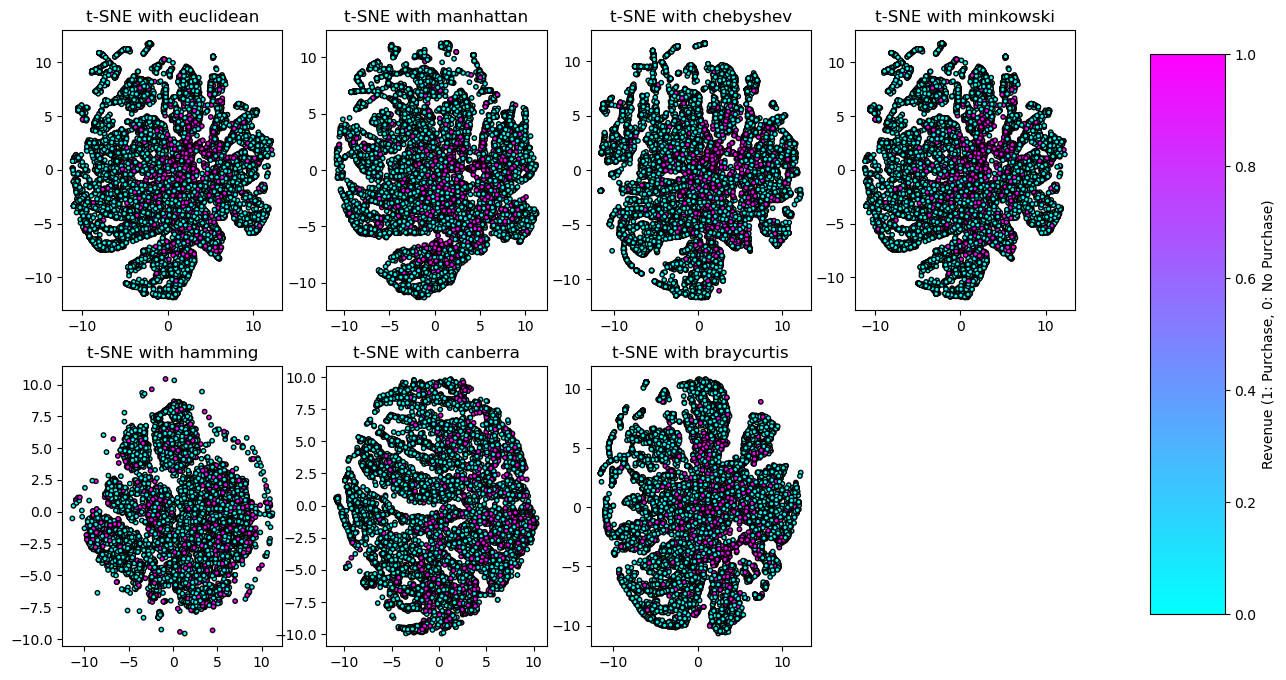

In [81]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# List of metrics to use with t-SNE
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'hamming', 'canberra', 'braycurtis']

# Create a figure
fig, axes = plt.subplots(2, 4, figsize=(15, 8))  # Adjusted to handle subplot indexing better

for i, metric in enumerate(metrics):
    # Apply t-SNE with the specified metric
    tsne = TSNE(n_components=2, random_state=42, metric=metric, perplexity=30, n_iter=300)
    X_tsne = tsne.fit_transform(X_scaled)

    # Subplot for each metric
    ax = axes[i // 4, i % 4]  # Correcting the subplot indexing
    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='cool', s=10, edgecolor='k')
    ax.set_title(f"t-SNE with {metric}")
    ax.axis('tight')

# Handling empty subplot (if any, since you have 7 metrics and 8 subplots)
axes[-1, -1].axis('off')

# Add a color bar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = plt.colorbar(scatter, cax=cbar_ax)
cbar.set_label('Revenue (1: Purchase, 0: No Purchase)')

plt.show()


### Analysis of t-SNE Results Using Various Distance Metrics

The t-SNE visualizations depicted above illustrate how different distance metrics affect the clustering of online shopper data, with each plot colored by the "Revenue" outcome (ranging from purple for no purchases to pink for purchases).

#### Key Observations:
- **Metric Influence:** Metrics such as Euclidean, Manhattan, and Minkowski show tight clustering which might indicate groups of similar behaviors or profiles that lead to purchases. Metrics like Canberra and Bray-Curtis highlight more subtle distinctions that could inform nuanced targeting strategies.
- **Cluster Patterns:** Dense clusters (particularly in pink zones) suggest common behaviors among purchasers that could be leveraged for targeted marketing or predictive features in a classification model.

#### Implications for Classification Models:
- **Feature Engineering:** The distribution and separation in clusters can help identify influential features that distinguish between purchasers and non-purchasers. These features can be crucial for enhancing the predictive power of a classification model aimed at predicting "Revenue".
- **Model Strategy:** Understanding which metrics and resulting t-SNE configurations yield more meaningful separations can guide the selection of distance functions in nearest-neighbor algorithms or influence the architecture of neural networks.
- **Customer Insight:** Clusters with higher densities of purchasers provide a focus for deep diving into customer analytics, potentially leading to more personalized customer experiences and optimized conversion strategies.

#### Conclusion:
t-SNE visualizations, particularly with a careful choice of metric, offer valuable insights for developing robust classification models in e-commerce. By revealing how shoppers cluster based on various behaviors, these plots help pinpoint effective ways to target potential buyers, ultimately aiming to enhance revenue generation strategies.


### Visual Analysis of Numerical Features

We employ a custom function to plot histograms, density plots, and box plots for each numerical feature in our dataset. This visualization serves multiple purposes:
- **Histograms** provide a quick view of the distribution and frequency of data points.
- **Density Plots** offer insights into the data's distribution shape and potential skewness.
- **Box Plots** highlight the central tendency and variability of the data, along with outliers.

These plots are crucial for initial data analysis, helping to understand the underlying patterns, detect outliers, and guide further data cleaning and transformation.


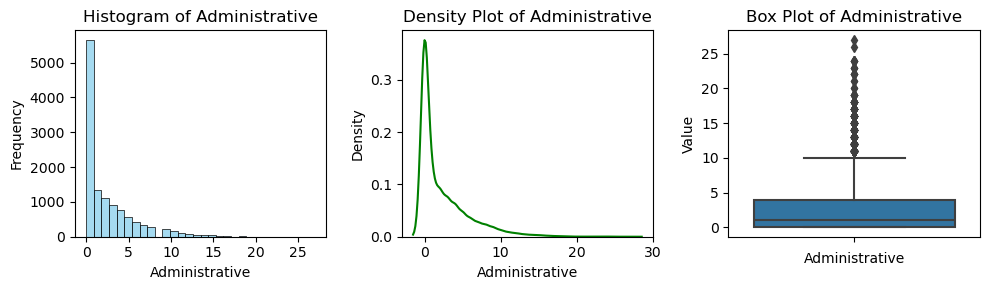

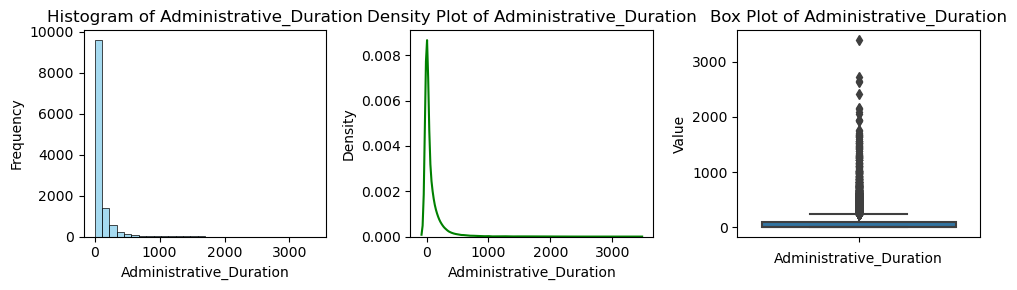

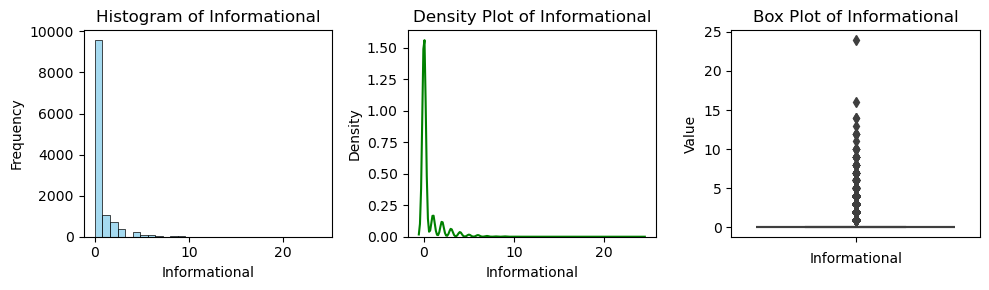

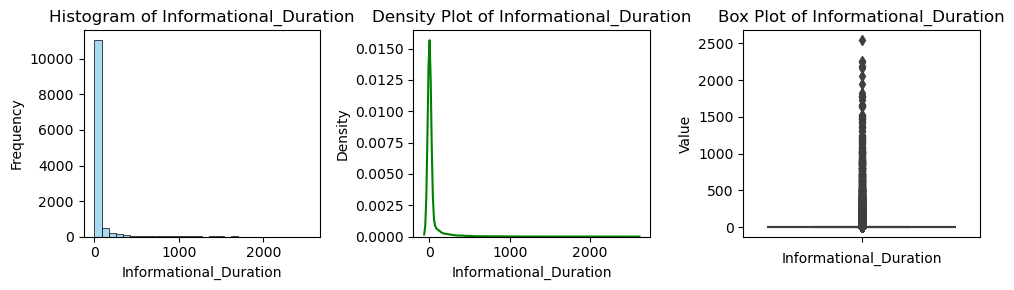

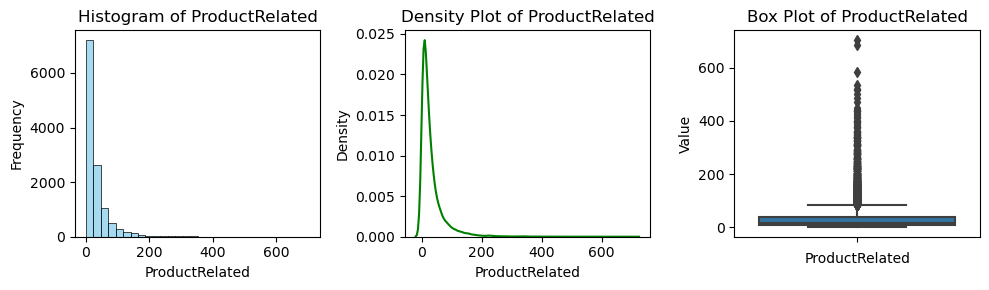

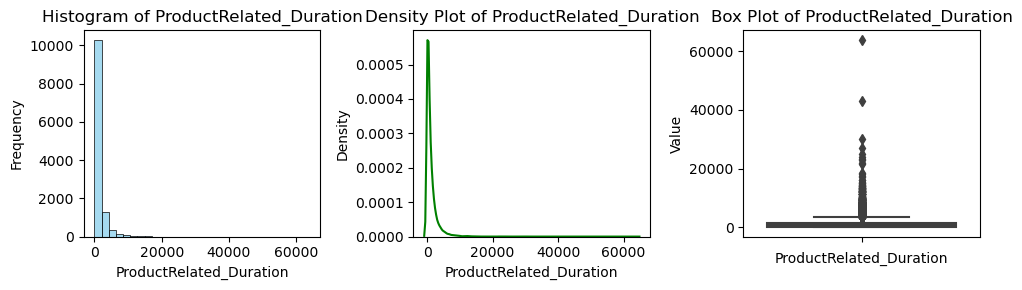

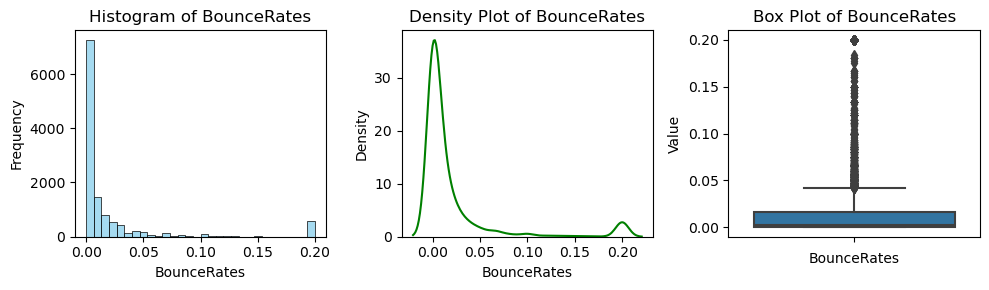

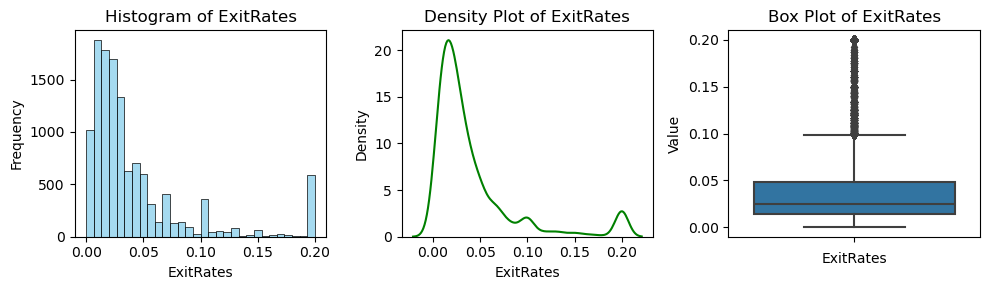

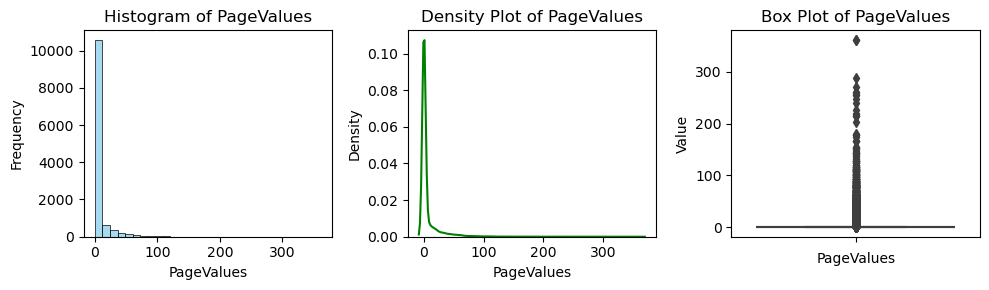

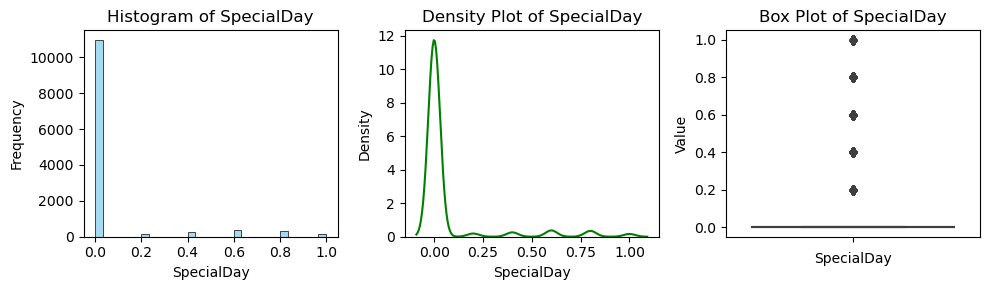

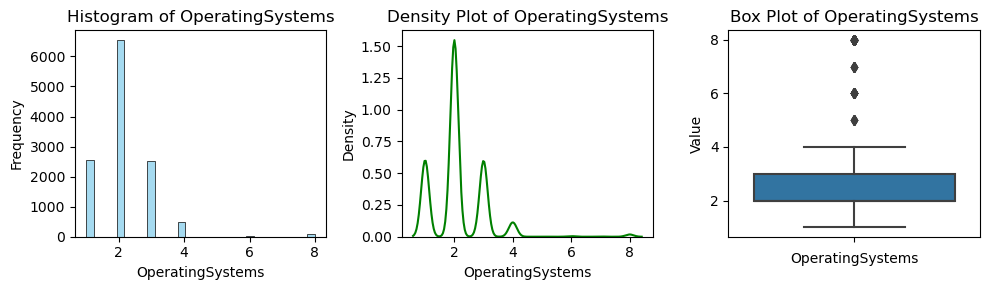

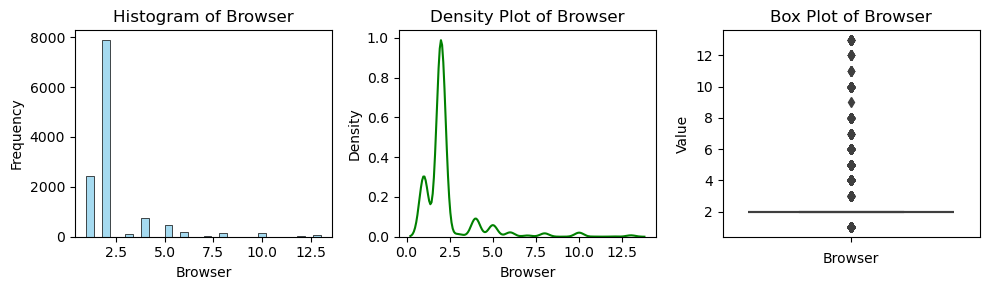

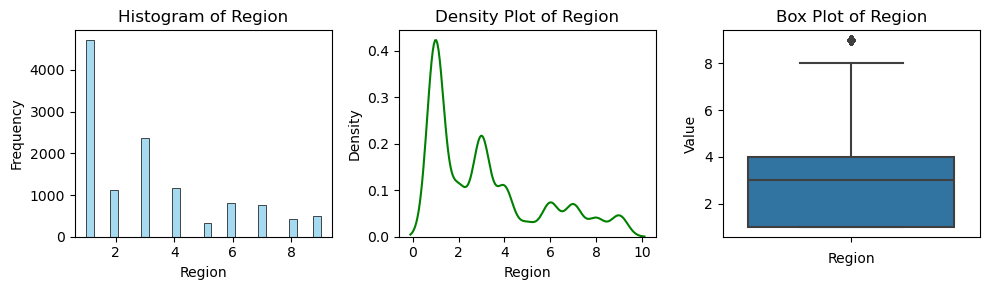

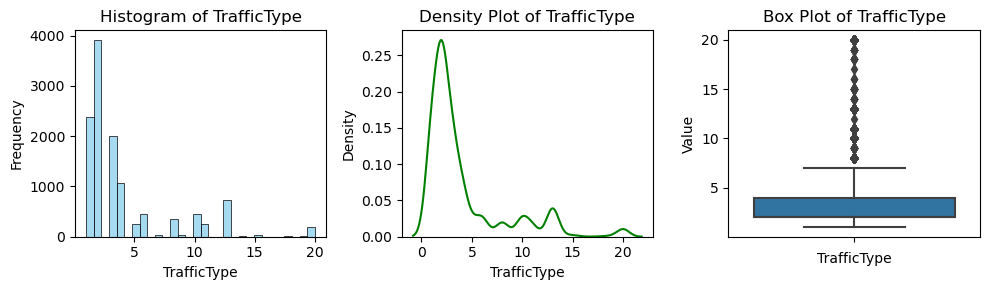

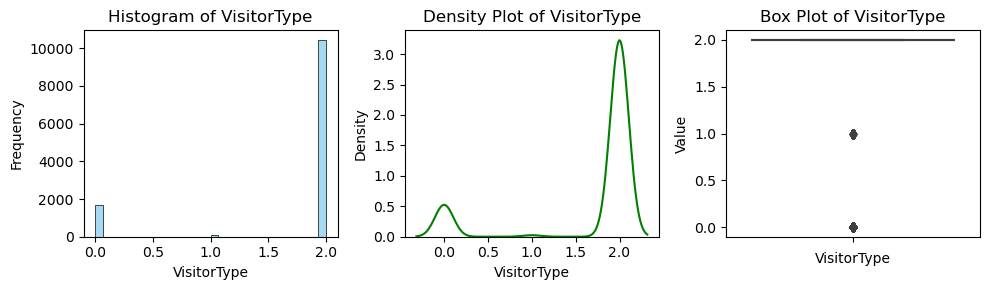

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_numerical_stats(df):
    """
    Plots the histogram, density plot, and box plot for each numerical column in the DataFrame.
    
    Args:
    df (pd.DataFrame): DataFrame containing only numerical columns.
    """
    num_columns = df.select_dtypes(include=['number']).columns
    for col in num_columns:
        plt.figure(figsize=(10, 3))
        
        # Plot histogram
        plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
        sns.histplot(df[col], kde=False, color='skyblue', bins=30)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        
        # Plot density
        plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
        sns.kdeplot(df[col], color='green')
        plt.title(f'Density Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Density')

        # Plot box plot
        plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
        sns.boxplot(y=df[col])
        plt.title(f'Box Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Value')
        
        plt.tight_layout()
        plt.show()

# Assuming 'df_oshp' is your DataFrame containing the online shoppers dataset
# Call the function with the DataFrame
plot_numerical_stats(data)


#### Implications of Numerical Feature Distributions
The visualizations above reveal the distributions of several numerical features in the Online Shoppers dataset through histograms, density plots, and box plots.
#### 1. Administrative and Administrative_Duration
    Distribution: Right-skewed with a concentration of low values and a long tail.
    Outliers: Numerous, especially in duration.
##### Implications:
    Scaling: Use transformations (e.g., log) to normalize.
    Outliers: Remove or cap to avoid undue influence.
#### 2. Informational and Informational_Duration
    Distribution: Right-skewed, similar to administrative features.
    Outliers: High number, indicating varied informational activity levels.
##### Implications:
    Feature Engineering: Transform skewed data.
    Outliers: Evaluate and handle appropriately.
#### 3. ProductRelated and ProductRelated_Duration
    Distribution: Right-skewed with significant outliers.
    Outliers: Especially in duration, indicating high engagement in some sessions.
##### Implications:
    Model Complexity: High engagement outliers could be indicators of purchasing intent.
    Behavioral Insights: Useful for building the classification model.
    General Implications for Model Building
    Skewed Data: Apply transformations to normalize.
    Outliers: Address through trimming, capping, or robust models.
    Feature Importance: Properly processed features can enhance predictive power for revenue outcomes.
By addressing these implications, the classification model will better predict purchasing behavior, aiding in revenue optimization for the e-commerce platform.

### Transforming Right-Skewed Columns with Box-Cox Transformation


In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox, skew, kurtosis

# Function to plot density with skewness and kurtosis
def plot_distribution(df, column):
    plt.figure(figsize=(10, 4))
    sns.kdeplot(df[column], fill=True)
    plt.title(f'Density Plot of {column} | Skew: {df[column].skew():.2f} | Kurtosis: {df[column].kurtosis():.2f}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()


#### Function to Plot Density with Skewness and Kurtosis

The function `plot_distribution` plots the density of a given column along with its skewness and kurtosis values, providing insights into the distribution characteristics.

The following code identifies right-skewed numerical columns and applies the Box-Cox transformation to normalize them:


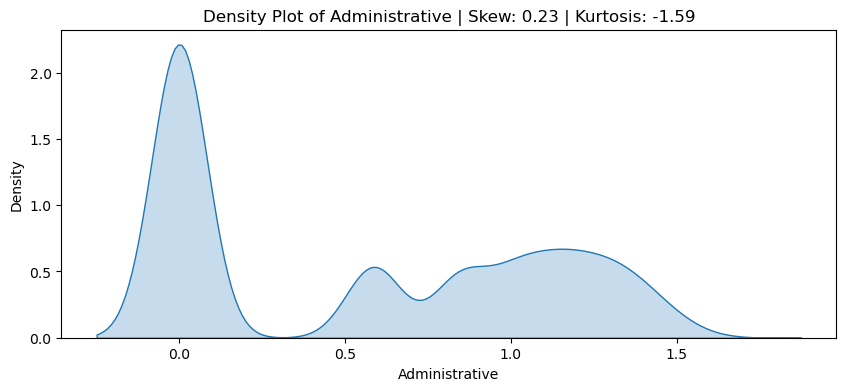

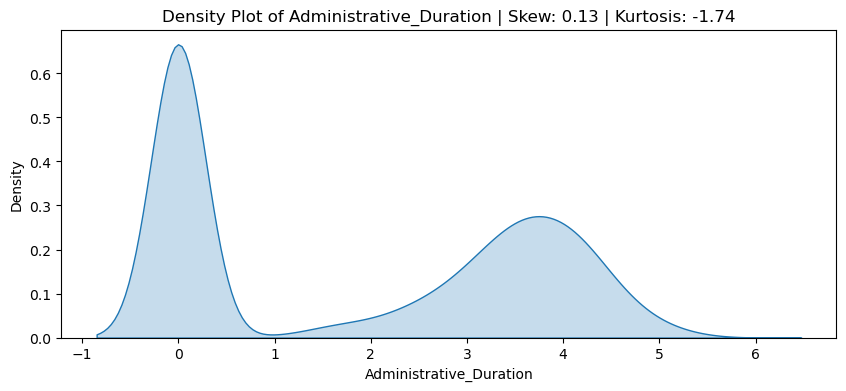

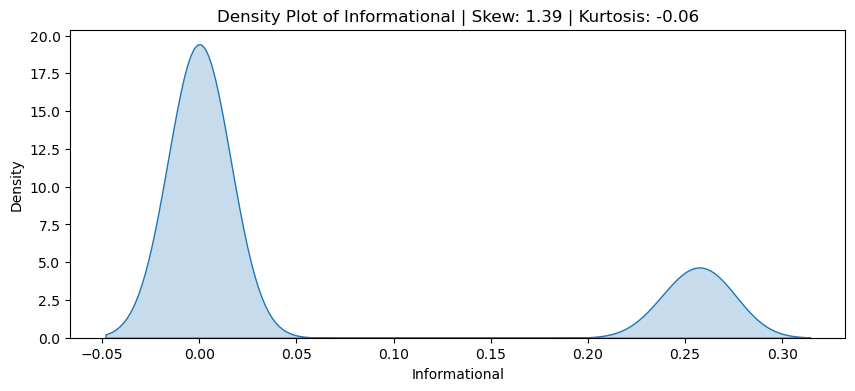

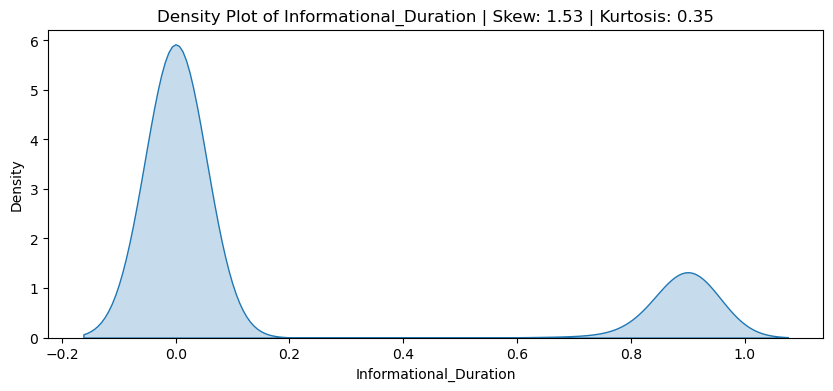

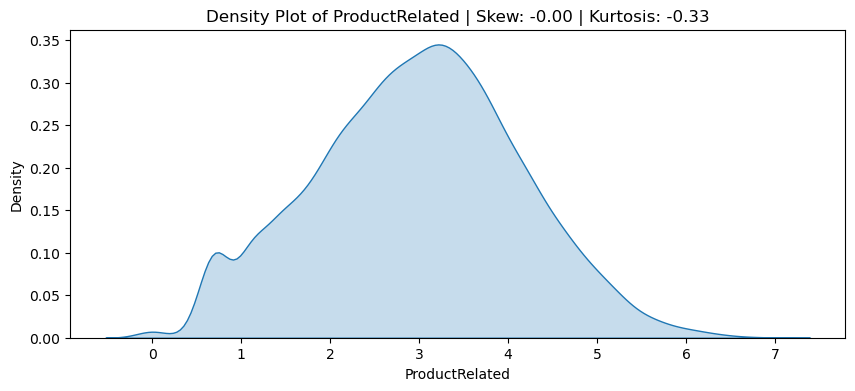

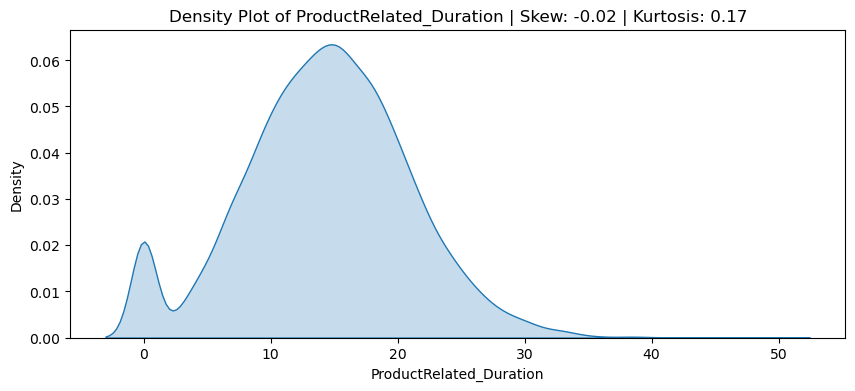

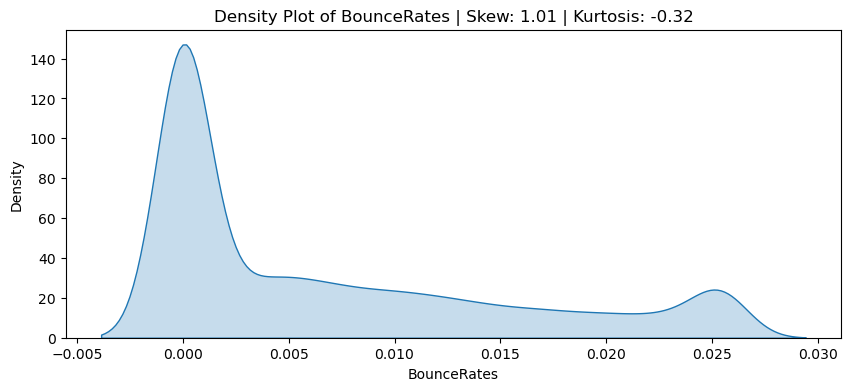

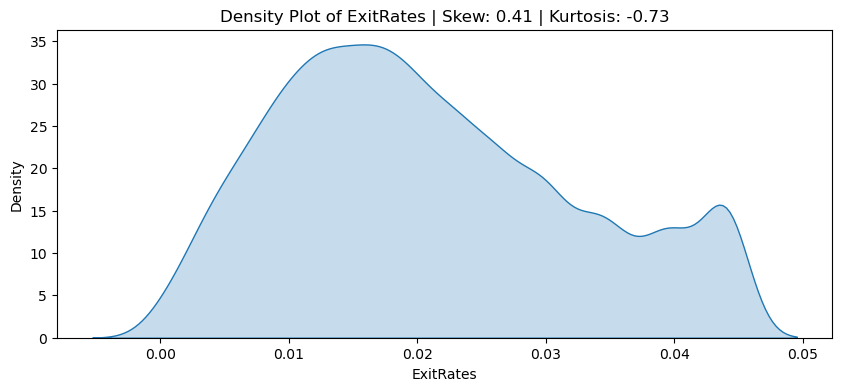

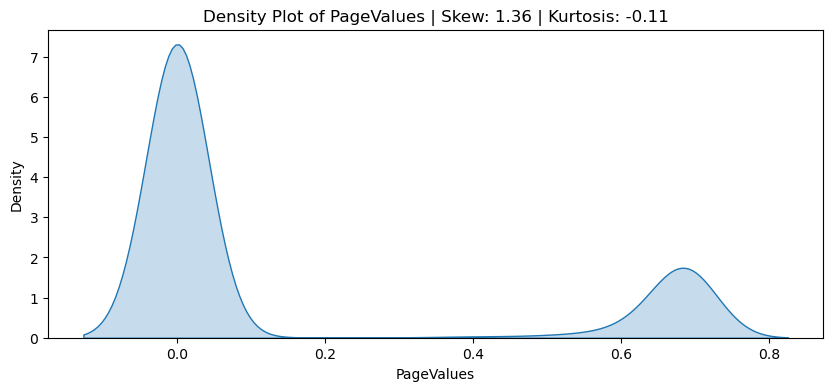

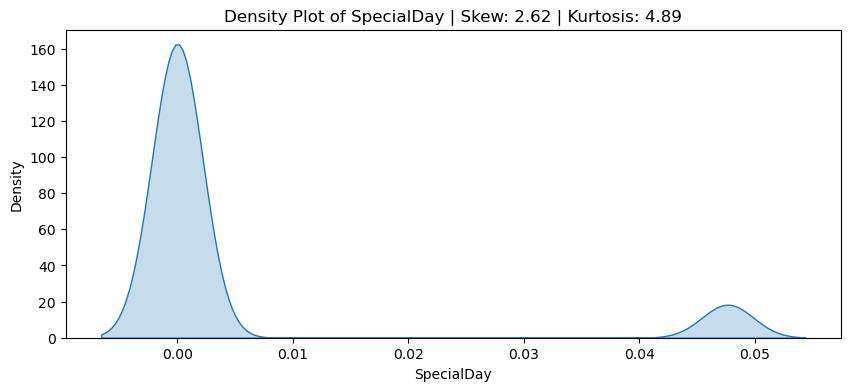

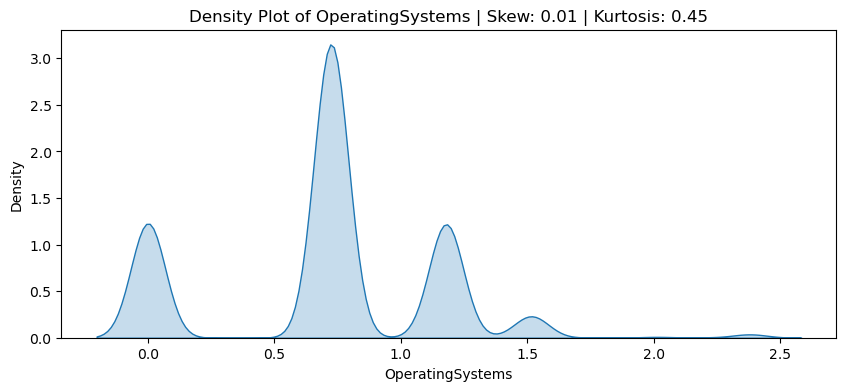

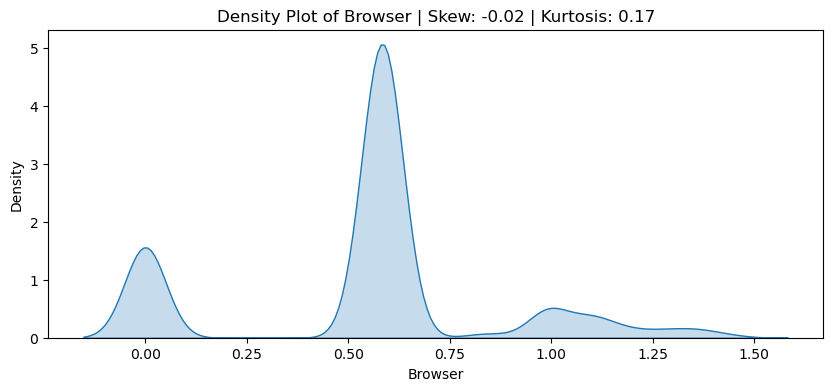

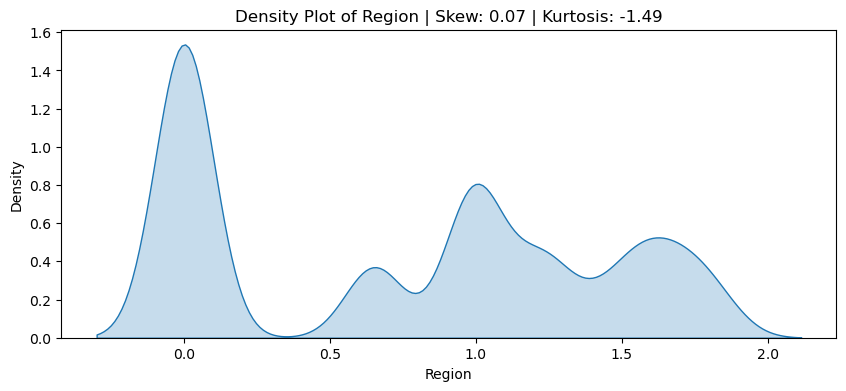

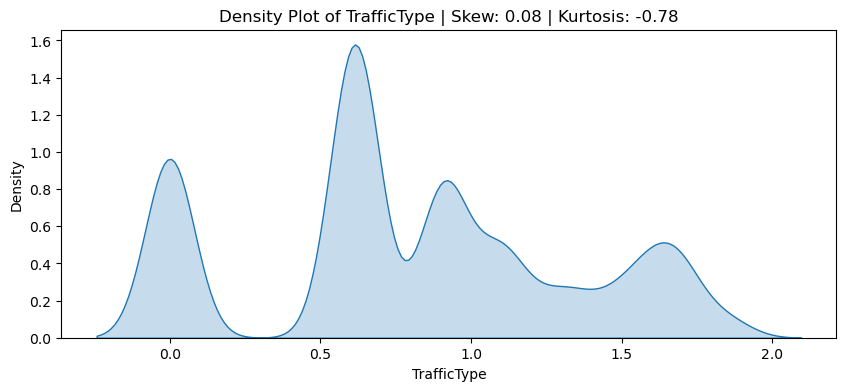

In [19]:
transformed_df = data.copy()

# Identify and transform right-skewed columns
for col in data.select_dtypes(include=['float', 'int']).columns:
    # Check if the column is right-skewed
    if data[col].skew() > 0.5:  # Skewness threshold can be adjusted
        # Ensure all data are positive (Box-Cox requires positive values)
        data_shifted = data[col] - data[col].min() + 1  # Shift data to ensure positivity
        
        # Apply Box-Cox transformation
        transformed_column_name = f'{col}'
        transformed_df[transformed_column_name], fitted_lambda = boxcox(data_shifted)
        
        # Optionally plot distribution of the transformed data
        plot_distribution(transformed_df, transformed_column_name)

#### Implications for Model Building
    Normalized Data: The Box-Cox transformation helps in normalizing skewed distributions, improving the performance and reliability of machine learning models.
    Feature Engineering: Transformed features can be used alongside original features to provide models with different perspectives on the data.
    Data Quality: Reducing skewness and adjusting kurtosis can lead to better model accuracy and generalizability.
By transforming skewed data, the models built on this data will be better equipped to learn patterns and make accurate predictions, ultimately enhancing the predictive power for targeting "Revenue" outcomes.

In [20]:
transformed_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.000000,0.000000,0.0,0.0,0.696503,0.000000,0.025562,0.044254,0.000000,0.0,Feb,0.000000,0.000000,0.000000,0.000000,Returning_Visitor,False,False
1,0.000000,0.000000,0.0,0.0,1.107058,6.938392,0.000000,0.039613,0.000000,0.0,Feb,0.724571,0.583860,0.000000,0.615207,Returning_Visitor,False,False
2,0.000000,0.000000,0.0,0.0,0.696503,0.000000,0.025562,0.044254,0.000000,0.0,Feb,1.515816,0.000000,1.814435,0.911442,Returning_Visitor,False,False
3,0.000000,0.000000,0.0,0.0,1.107058,1.509991,0.021784,0.042584,0.000000,0.0,Feb,1.178945,0.583860,0.651611,1.097452,Returning_Visitor,False,False
4,0.000000,0.000000,0.0,0.0,2.438376,14.545761,0.013786,0.029794,0.000000,0.0,Feb,1.178945,0.841055,0.000000,1.097452,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,1.001328,3.951040,0.0,0.0,4.101844,19.588941,0.006213,0.021181,0.681291,0.0,Dec,1.515816,1.174429,0.000000,0.000000,Returning_Visitor,True,False
12326,0.000000,0.000000,0.0,0.0,1.814298,13.312733,0.000000,0.016852,0.000000,0.0,Nov,1.178945,0.583860,0.000000,1.475472,Returning_Visitor,True,False
12327,0.000000,0.000000,0.0,0.0,1.972512,9.971263,0.024463,0.037925,0.000000,0.0,Nov,1.178945,0.583860,0.000000,1.690466,Returning_Visitor,True,False
12328,1.107243,3.535565,0.0,0.0,2.826803,12.163855,0.000000,0.016680,0.000000,0.0,Nov,0.724571,0.583860,0.996714,1.620590,Returning_Visitor,False,False


### Building and Evaluating Classification Models


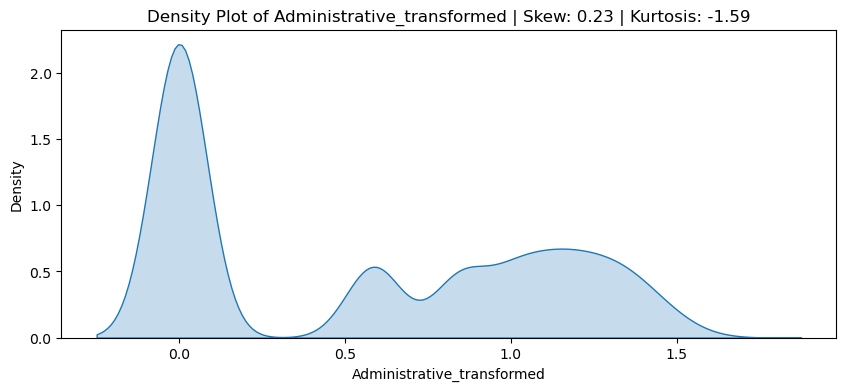

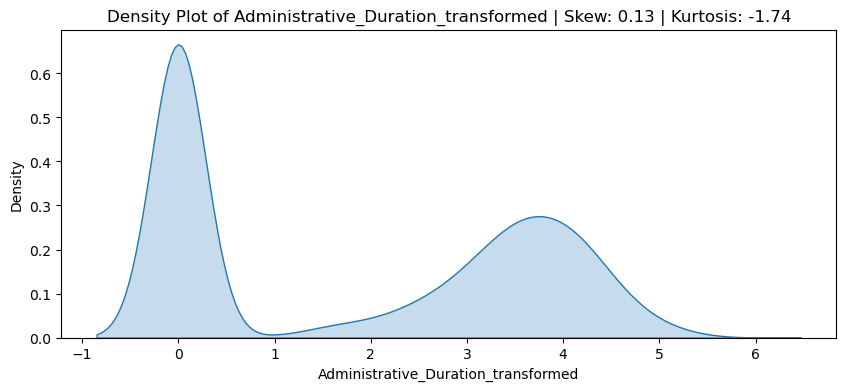

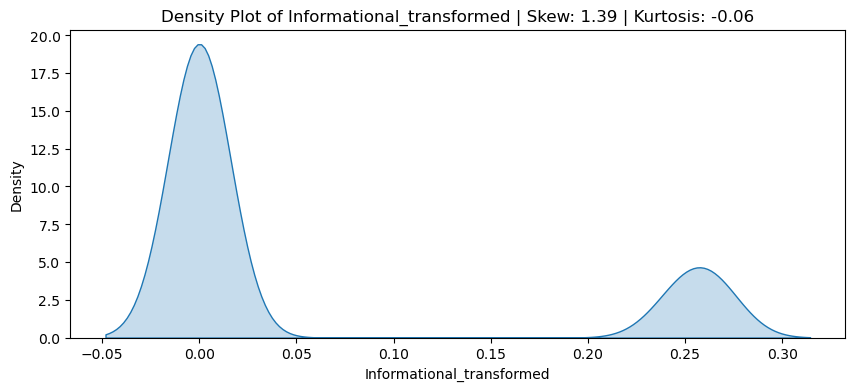

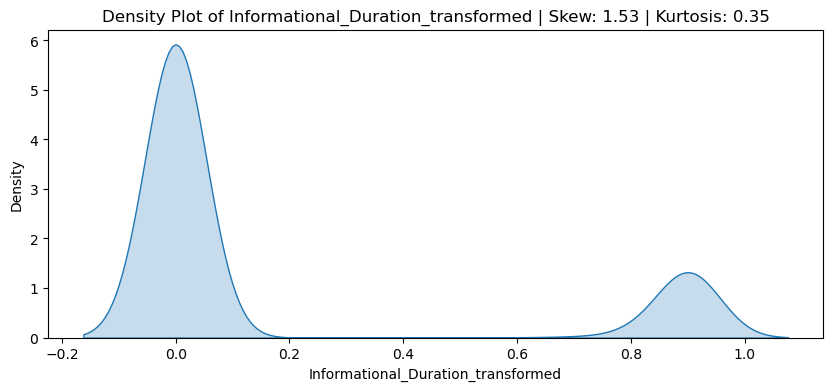

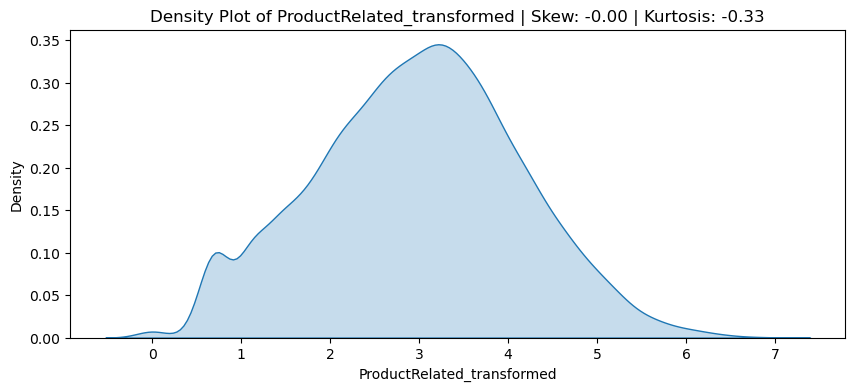

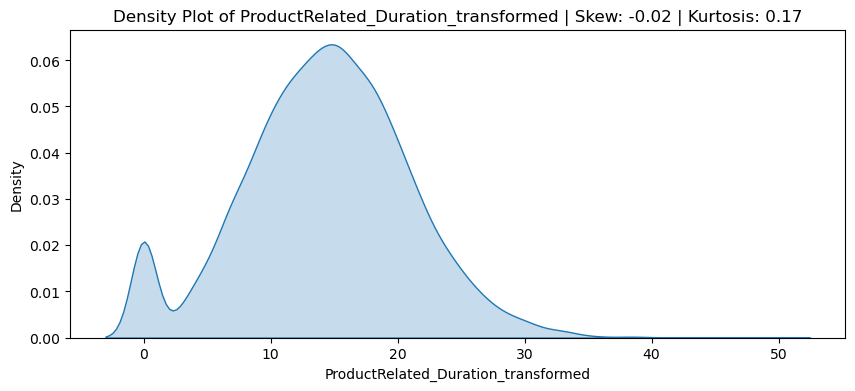

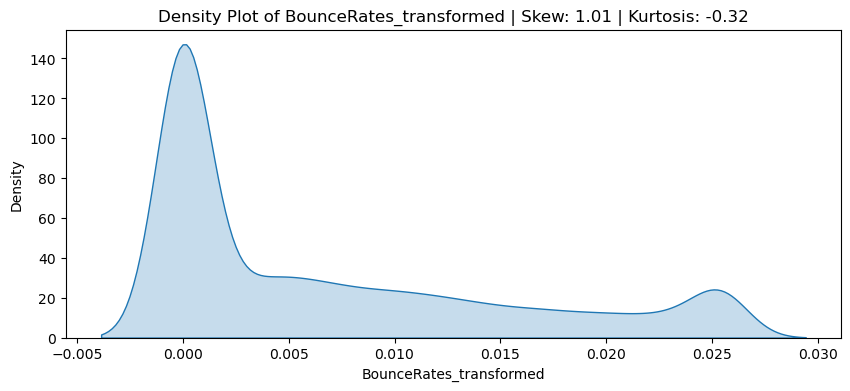

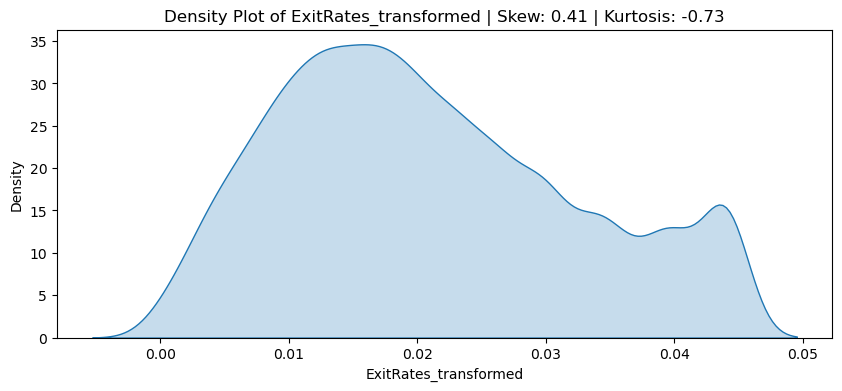

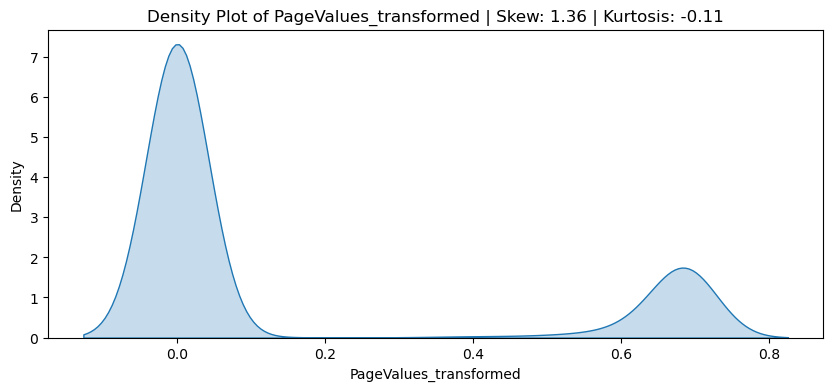

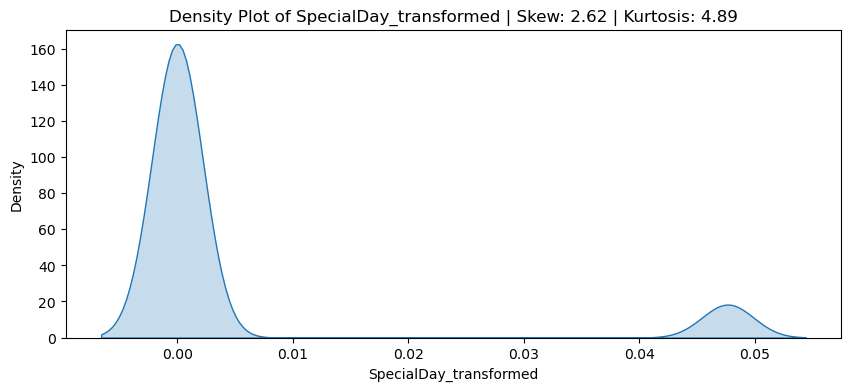

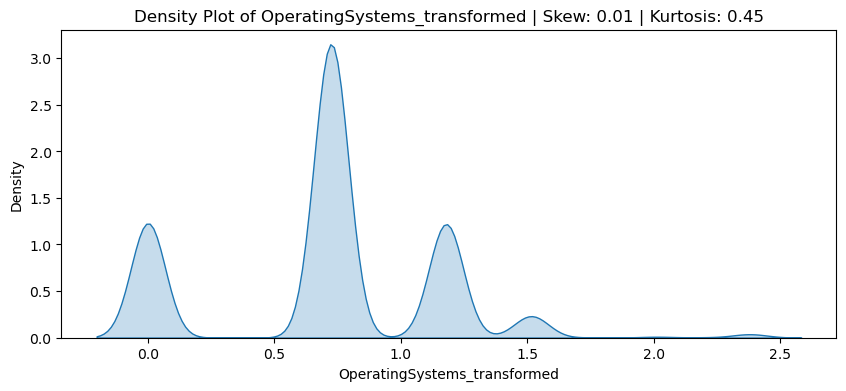

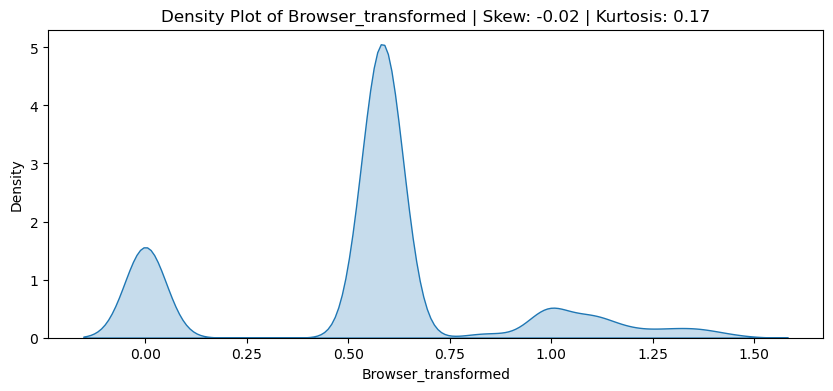

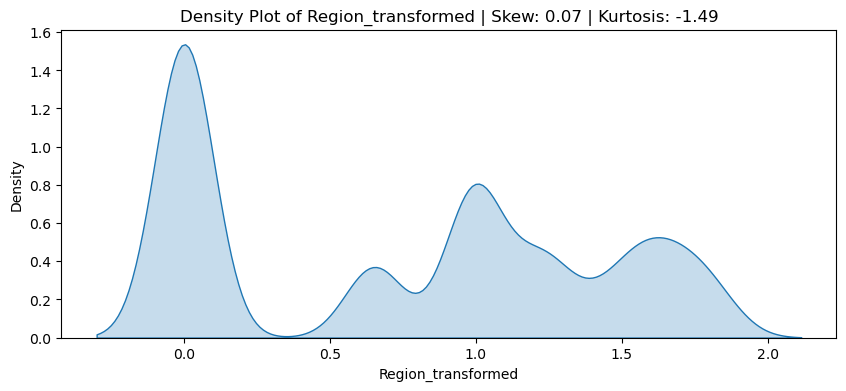

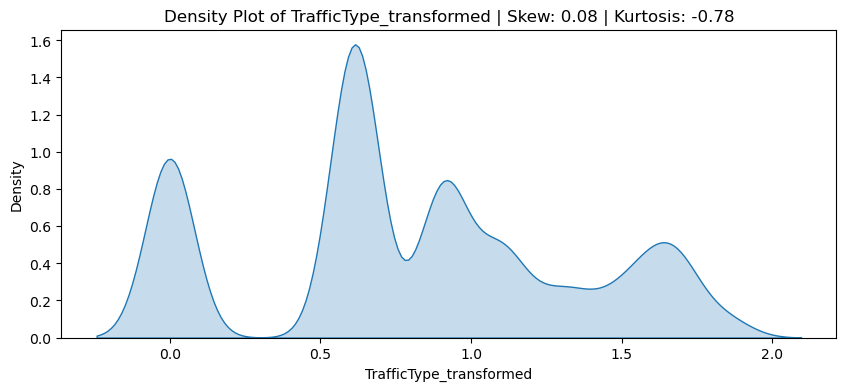

/home/vedant/anaconda3/envs/onshop/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vedant/anaconda3/envs/onshop/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vedant/anaconda3/envs/onshop/lib/python3.9/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/home/vedant/anaconda3/envs/onshop/lib/python3.9/site-packages/sklearn/base.py", line 637, in _validate_params
    va

[LightGBM] [Info] Number of positive: 1237, number of negative: 6574
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001322 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2426
[LightGBM] [Info] Number of data points in the train set: 7811, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.158366 -> initscore=-1.670433
[LightGBM] [Info] Start training from score -1.670433
[LightGBM] [Info] Number of positive: 1237, number of negative: 6574
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000668 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2429
[LightGBM] [Info] Number of data points in the train set: 7811, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.158366 -> initscore=-1.670433
[LightGB

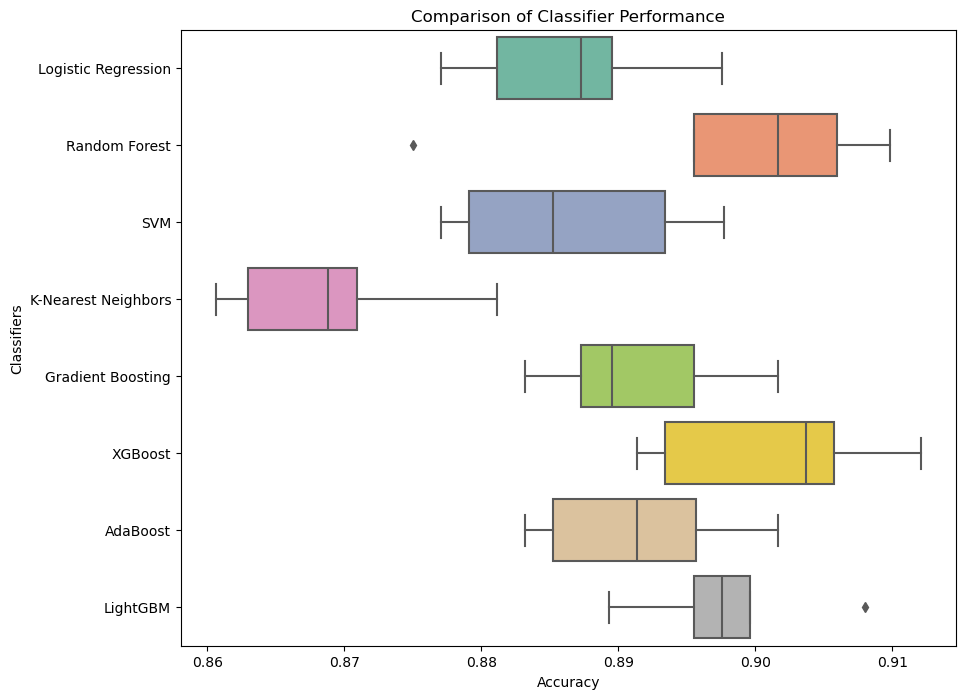

/home/vedant/anaconda3/envs/onshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning:

[20:58:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




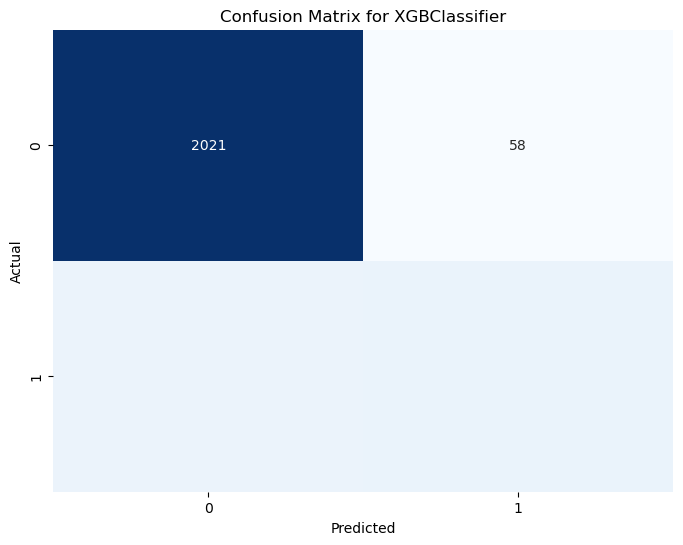

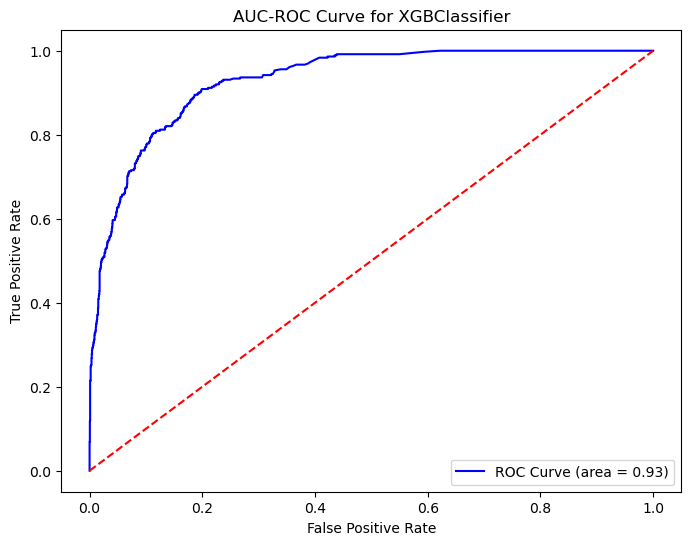

In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
import xgboost as xgb
import lightgbm as lgb

# Function to plot density with skewness and kurtosis
def plot_distribution(df, column):
    plt.figure(figsize=(10, 4))
    sns.kdeplot(df[column], fill=True)
    plt.title(f'Density Plot of {column} | Skew: {df[column].skew():.2f} | Kurtosis: {df[column].kurtosis():.2f}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

# Apply Box-Cox transformation to skewed numerical features
transformed_df = data.copy()
for col in data.select_dtypes(include=['float', 'int']).columns:
    if data[col].skew() > 0.5:  # Skewness threshold can be adjusted
        data_shifted = data[col] - data[col].min() + 1  # Shift data to ensure positivity
        transformed_column_name = f'{col}_transformed'
        transformed_df[transformed_column_name], _ = boxcox(data_shifted)
        # plot_distribution(transformed_df, transformed_column_name)

# Drop the original skewed columns and replace with transformed columns
for col in data.select_dtypes(include=['float', 'int']).columns:
    if data[col].skew() > 0.5:
        transformed_df.drop(columns=[col], inplace=True)

# Engineer new features, ensuring the columns exist
if set(['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']).issubset(transformed_df.columns):
    transformed_df['SessionLength'] = transformed_df[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']].sum(axis=1)
if set(['Administrative', 'Informational', 'ProductRelated']).issubset(transformed_df.columns):
    transformed_df['TotalActions'] = transformed_df[['Administrative', 'Informational', 'ProductRelated']].sum(axis=1)
if set(['BounceRates', 'ExitRates']).issubset(transformed_df.columns):
    transformed_df['CombinedBounceRate'] = transformed_df['BounceRates'] + transformed_df['ExitRates']
if 'Weekend' in transformed_df.columns:
    transformed_df['IsWeekend'] = transformed_df['Weekend'].astype(int)

# Identify categorical columns for one-hot encoding
categorical_cols = ['Month', 'VisitorType']  # Add other categorical columns if necessary

# One-hot encode categorical variables
data_encoded = pd.get_dummies(transformed_df, columns=categorical_cols, drop_first=True)

# Split the dataset into features and target variable
X = data_encoded.drop('Revenue', axis=1)  # Ensure 'Revenue' is dropped as it's the target
y = transformed_df['Revenue']  # Assuming 'Revenue' is already correctly set up
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Add the first two principal components to the original data
X_train_extended = pd.DataFrame(np.concatenate([X_train_scaled, X_train_pca], axis=1))
X_test_extended = pd.DataFrame(np.concatenate([X_test_scaled, X_test_pca], axis=1))

# Define the parameter grid for each classifier
param_grid = {
    "Logistic Regression": {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']},
    "Random Forest": {'n_estimators': [10, 100, 500], 'max_features': ['auto', 'sqrt', 'log2']},
    "SVM": {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']},
    "K-Nearest Neighbors": {'n_neighbors': [3, 5, 10], 'weights': ['uniform', 'distance']},
    "Gradient Boosting": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    "XGBoost": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    "AdaBoost": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
    "LightGBM": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'num_leaves': [31, 64, 128]}
}

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "AdaBoost": AdaBoostClassifier(),
    "LightGBM": lgb.LGBMClassifier()
}

# Metrics to evaluate
scoring = {'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score), 'f1': make_scorer(f1_score)}

# Perform Grid Search and evaluate metrics
results = {}
best_model = None
best_accuracy = 0
for name, clf in classifiers.items():
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid[name], scoring=scoring, refit='accuracy', return_train_score=False, cv=5)
    grid_search.fit(X_train_extended, y_train)
    scores = cross_val_score(grid_search.best_estimator_, X_test_extended, y_test, cv=5, scoring='accuracy')
    results[name] = scores
    
    # Identify the best model based on accuracy
    if scores.mean() > best_accuracy:
        best_accuracy = scores.mean()
        best_model = grid_search.best_estimator_

# Visualization using boxplot
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=pd.DataFrame(results), orient='h', palette='Set2')
ax.set_title('Comparison of Classifier Performance')
ax.set_xlabel('Accuracy')
ax.set_ylabel('Classifiers')
# plt.show()

# Confusion Matrix and AUC-ROC for the best model
best_model.fit(X_train_extended, y_train)
y_pred = best_model.predict(X_test_extended)

# Confusion Matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.title(f'Confusion Matrix for {best_model.__class__.__name__}')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

# AUC-ROC Curve
y_prob = best_model.predict_proba(X_test_extended)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'AUC-ROC Curve for {best_model.__class__.__name__}')
plt.legend(loc='lower right')
plt.show()


#### Classifier Performance: 
The boxplot shows the distribution of accuracy scores across different classifiers (Logistic Regression, Random Forest, etc.) on a scale from 0.86 to 0.91. The horizontal lines within each box represent the median accuracy (center line), the upper and lower quartiles (boxes), and the range of outliers (whiskers).

#### Accuracy Range: 
All the classifiers have a median accuracy between 0.88 and 0.89, indicating a relatively similar performance in correctly predicting purchase intention.




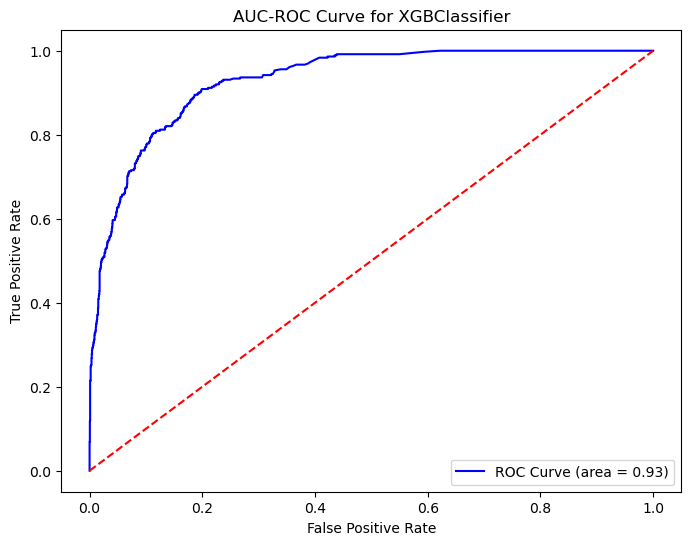

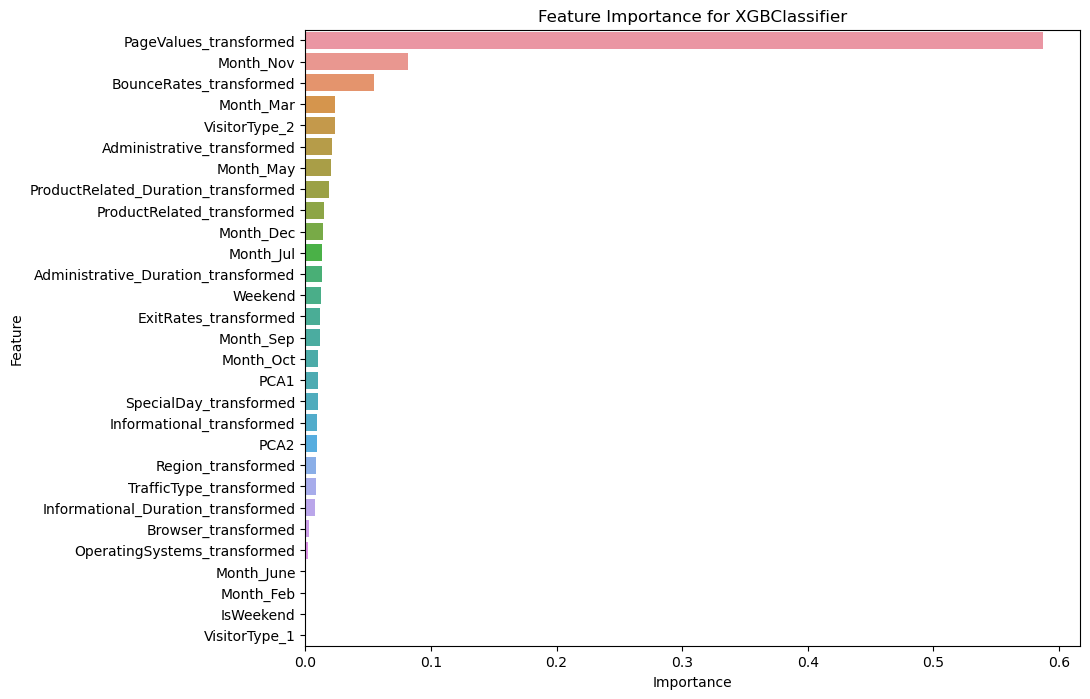

In [101]:
# AUC-ROC Curve
y_prob = best_model.predict_proba(X_test_extended)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'AUC-ROC Curve for {best_model.__class__.__name__}')
plt.legend(loc='lower right')
plt.show()

# Feature Importance for the best model
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
elif hasattr(best_model, 'coef_'):
    importances = np.abs(best_model.coef_[0])
else:
    importances = None

if importances is not None:
    feature_names = list(X.columns) + ['PCA1', 'PCA2']
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title(f'Feature Importance for {best_model.__class__.__name__}')
    plt.show()

{'Logistic Regression': array([0.88957055, 0.88114754, 0.88729508, 0.87704918, 0.89754098]),
 'Random Forest': array([0.90593047, 0.90163934, 0.875     , 0.8954918 , 0.90983607]),
 'SVM': array([0.89775051, 0.8852459 , 0.87704918, 0.87909836, 0.89344262]),
 'K-Nearest Neighbors': array([0.86298569, 0.86065574, 0.88114754, 0.86885246, 0.87090164]),
 'Gradient Boosting': array([0.88957055, 0.90163934, 0.88729508, 0.88319672, 0.8954918 ]),
 'XGBoost': array([0.91206544, 0.9057377 , 0.89344262, 0.89139344, 0.90368852]),
 'AdaBoost': array([0.89570552, 0.89139344, 0.8852459 , 0.88319672, 0.90163934]),
 'LightGBM': array([0.90797546, 0.8954918 , 0.88934426, 0.89959016, 0.89754098])}

In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Assuming 'transformed_df' is your DataFrame
# Include 'Month' and 'VisitorType' in one-hot encoding, 'Revenue' is the target

# Identify categorical columns for one-hot encoding
categorical_cols = ['Month', 'VisitorType']  # Add other categorical columns if necessary

# One-hot encode categorical variables
data_encoded = pd.get_dummies(transformed_df, columns=categorical_cols, drop_first=True)

# Split the dataset into features and target variable
X = data_encoded.drop('Revenue', axis=1)  # Ensure 'Revenue' is dropped as it's the target
y = transformed_df['Revenue']  # Assuming 'Revenue' is already correctly set up


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Add the first two principal components to the original data
X_train_extended = pd.concat([pd.DataFrame(X_train_scaled), pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])], axis=1)
X_test_extended = pd.concat([pd.DataFrame(X_test_scaled), pd.DataFrame(X_test_pca, columns=['PC1', 'PC2'])], axis=1)


In [26]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}
for name, clf in classifiers.items():
    clf.fit(X_train_extended, y_train)  # Use the extended dataset with PCA components
    y_pred = clf.predict(X_test_extended)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} accuracy: {accuracy:.4f}")


Logistic Regression accuracy: 0.8947
Random Forest accuracy: 0.9050
SVM accuracy: 0.8996
K-Nearest Neighbors accuracy: 0.8824
Gradient Boosting accuracy: 0.9045


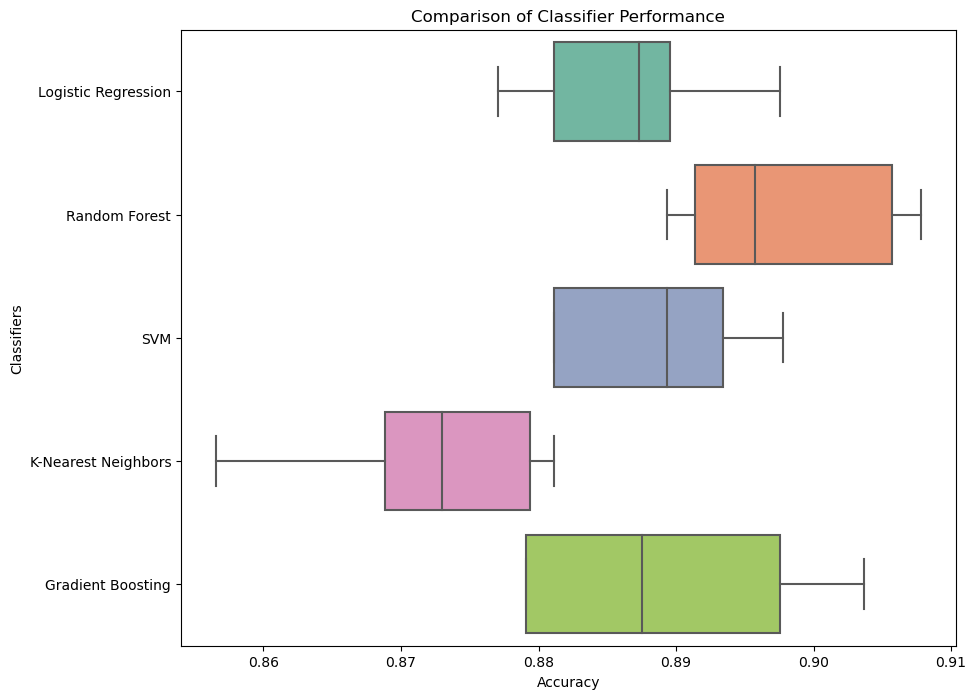

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Add the first two principal components to the original data
X_train_extended = pd.DataFrame(np.concatenate([X_train_scaled, X_train_pca], axis=1))
X_test_extended = pd.DataFrame(np.concatenate([X_test_scaled, X_test_pca], axis=1))

# Define the parameter grid for each classifier
param_grid = {
    "Logistic Regression": {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']},
    "Random Forest": {'n_estimators': [10, 100, 500], 'max_features': ['auto', 'sqrt', 'log2']},
    "SVM": {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']},
    "K-Nearest Neighbors": {'n_neighbors': [3, 5, 10], 'weights': ['uniform', 'distance']},
    "Gradient Boosting": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Metrics to evaluate
scoring = {'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score), 'f1': make_scorer(f1_score)}

# Perform Grid Search and evaluate metrics
results = {}
for name, clf in classifiers.items():
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid[name], scoring=scoring, refit='accuracy', return_train_score=False, cv=5)
    grid_search.fit(X_train_extended, y_train)
    scores = cross_val_score(grid_search.best_estimator_, X_test_extended, y_test, cv=5, scoring='accuracy')
    results[name] = scores

# Visualization using boxplot
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=pd.DataFrame(results), orient='h', palette='Set2')
ax.set_title('Comparison of Classifier Performance')
ax.set_xlabel('Accuracy')
ax.set_ylabel('Classifiers')
plt.show()


/home/kuvedant/anaconda3/envs/mlprojects/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/home/kuvedant/anaconda3/envs/mlprojects/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/home/kuvedant/anaconda3/envs/mlprojects/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/home/kuvedant/anaconda3/envs/mlprojects/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/home/kuvedant/anaconda3/envs/mlprojects/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the 

Results with KFold: 0.8865


/home/kuvedant/anaconda3/envs/mlprojects/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/home/kuvedant/anaconda3/envs/mlprojects/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/home/kuvedant/anaconda3/envs/mlprojects/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Results with StratifiedKFold: 0.8845


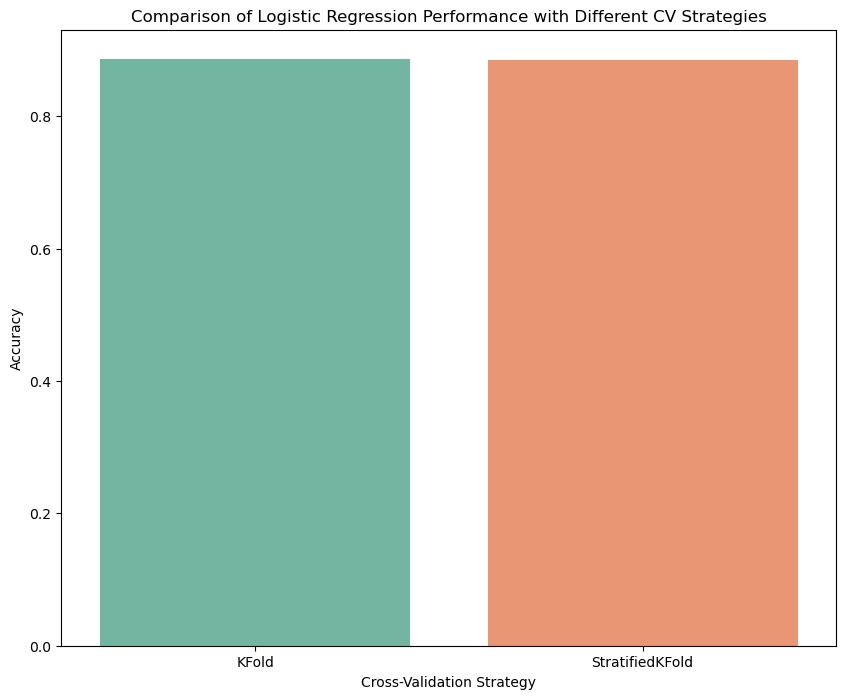

In [38]:
param_grid["Logistic Regression"] = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength, smaller values specify stronger regularization.
    'penalty': ['l1', 'l2'],  # Types of penalties (regularizations)
    'solver': ['liblinear', 'saga']  # Solvers that support both l1 and l2 penalties
}

from sklearn.model_selection import StratifiedKFold, KFold

# Define cross-validation strategies
cv_strategies = {
    "KFold": KFold(n_splits=5, random_state=42, shuffle=True),
    "StratifiedKFold": StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
}
from sklearn.metrics import accuracy_score, make_scorer

# Metrics to evaluate
scoring = {'accuracy': make_scorer(accuracy_score)}

# Perform Grid Search with varying cross-validation strategies
results = {}
for cv_name, cv_strategy in cv_strategies.items():
    grid_search = GridSearchCV(
        estimator=LogisticRegression(max_iter=1000),
        param_grid=param_grid["Logistic Regression"],
        scoring=scoring,
        refit='accuracy',
        return_train_score=False,
        cv=cv_strategy
    )
    grid_search.fit(X_train_extended, y_train)
    scores = cross_val_score(grid_search.best_estimator_, X_test_extended, y_test, cv=cv_strategy, scoring='accuracy')
    results[cv_name] = scores.mean()
    print(f"Results with {cv_name}: {scores.mean():.4f}")

# Visualization using bar plot
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='Set2')
ax.set_title('Comparison of Logistic Regression Performance with Different CV Strategies')
ax.set_xlabel('Cross-Validation Strategy')
ax.set_ylabel('Accuracy')
plt.show()


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dropout(0.25),
     Dense(64, activation='relu'),
    Dropout(0.5),
        Dense(64, activation='relu'),
    Dropout(0.5),
        Dense(64, activation='relu'),
    Dropout(0.5),
            Dense(64, activation='relu'),
    Dropout(0.5),       
      Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'softmax' and change units if it's a multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Change to 'categorical_crossentropy' for multi-class
              metrics=['accuracy'])


In [55]:
history = model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, validation_split=0.25)


Epoch 1/500
229/229 [==============================] - 2s 6ms/step - loss: 0.3679 - accuracy: 0.8364 - val_loss: 0.3551 - val_accuracy: 0.8337
Epoch 2/500
229/229 [==============================] - 1s 6ms/step - loss: 0.2825 - accuracy: 0.8497 - val_loss: 0.3408 - val_accuracy: 0.8947
Epoch 3/500
229/229 [==============================] - 1s 6ms/step - loss: 0.2773 - accuracy: 0.8791 - val_loss: 0.3166 - val_accuracy: 0.8939
Epoch 4/500
229/229 [==============================] - 1s 4ms/step - loss: 0.2683 - accuracy: 0.8860 - val_loss: 0.3535 - val_accuracy: 0.8939
Epoch 5/500
229/229 [==============================] - 1s 3ms/step - loss: 0.2586 - accuracy: 0.8940 - val_loss: 0.3281 - val_accuracy: 0.8980
Epoch 6/500
229/229 [==============================] - 1s 4ms/step - loss: 0.2565 - accuracy: 0.9015 - val_loss: 0.3223 - val_accuracy: 0.8968
Epoch 7/500
229/229 [==============================] - 1s 3ms/step - loss: 0.2508 - accuracy: 0.9002 - val_loss: 0.3002 - val_accuracy: 0.8984

77/77 - 0s - loss: 1.0524 - accuracy: 0.8804

Test accuracy: 0.8803768754005432


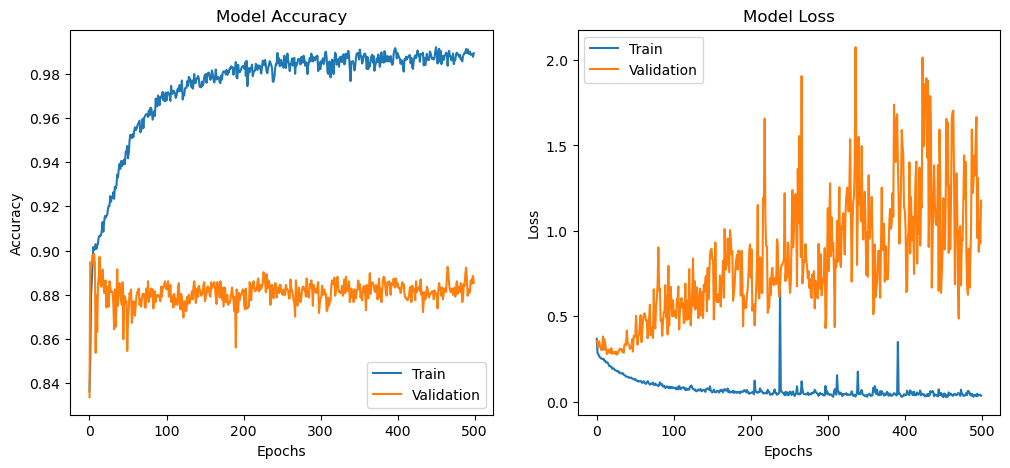

In [56]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=2)
print('\nTest accuracy:', test_acc)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [60]:
history = model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, validation_split=0.25)


Epoch 1/500
229/229 [==============================] - 3s 6ms/step - loss: 0.4962 - accuracy: 0.7811 - val_loss: 0.3121 - val_accuracy: 0.8980
Epoch 2/500
229/229 [==============================] - 2s 7ms/step - loss: 0.3017 - accuracy: 0.8837 - val_loss: 0.2400 - val_accuracy: 0.9009
Epoch 3/500
229/229 [==============================] - 1s 5ms/step - loss: 0.2662 - accuracy: 0.8927 - val_loss: 0.2342 - val_accuracy: 0.8976
Epoch 4/500
229/229 [==============================] - 1s 5ms/step - loss: 0.2544 - accuracy: 0.8921 - val_loss: 0.2291 - val_accuracy: 0.9009
Epoch 5/500
229/229 [==============================] - 1s 5ms/step - loss: 0.2440 - accuracy: 0.8944 - val_loss: 0.2265 - val_accuracy: 0.8939
Epoch 6/500
229/229 [==============================] - 1s 6ms/step - loss: 0.2395 - accuracy: 0.8976 - val_loss: 0.2483 - val_accuracy: 0.8804
Epoch 7/500
229/229 [==============================] - 1s 6ms/step - loss: 0.2362 - accuracy: 0.9010 - val_loss: 0.2273 - val_accuracy: 0.8988

77/77 - 0s - loss: 0.5476 - accuracy: 0.8853

Test accuracy: 0.8852928876876831


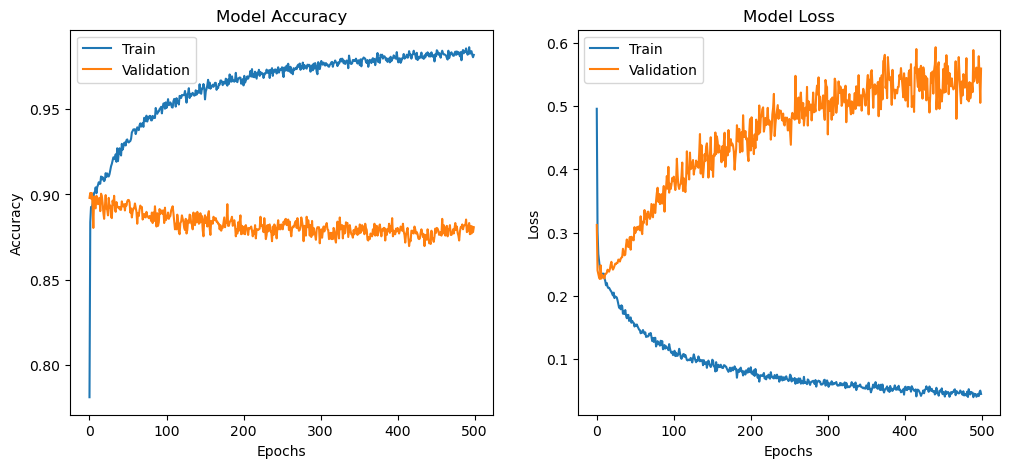

In [61]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=2)
print('\nTest accuracy:', test_acc)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [69]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
from tensorflow.keras.layers import BatchNormalization
model.add(BatchNormalization())

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [70]:
history = model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, validation_split=0.2)

Epoch 1/500
245/245 [==============================] - 2s 5ms/step - loss: 0.4897 - accuracy: 0.7862 - val_loss: 0.2957 - val_accuracy: 0.8930
Epoch 2/500
245/245 [==============================] - 1s 3ms/step - loss: 0.2985 - accuracy: 0.8836 - val_loss: 0.2441 - val_accuracy: 0.8909
Epoch 3/500
245/245 [==============================] - 1s 4ms/step - loss: 0.2686 - accuracy: 0.8852 - val_loss: 0.2336 - val_accuracy: 0.8945
Epoch 4/500
245/245 [==============================] - 1s 3ms/step - loss: 0.2537 - accuracy: 0.8926 - val_loss: 0.2238 - val_accuracy: 0.8976
Epoch 5/500
245/245 [==============================] - 1s 3ms/step - loss: 0.2478 - accuracy: 0.8950 - val_loss: 0.2265 - val_accuracy: 0.8961
Epoch 6/500
245/245 [==============================] - 1s 5ms/step - loss: 0.2430 - accuracy: 0.8977 - val_loss: 0.2232 - val_accuracy: 0.9027
Epoch 7/500
245/245 [==============================] - 1s 4ms/step - loss: 0.2486 - accuracy: 0.8937 - val_loss: 0.2260 - val_accuracy: 0.8935

77/77 - 0s - loss: 0.5438 - accuracy: 0.8845

Test accuracy: 0.8844735622406006


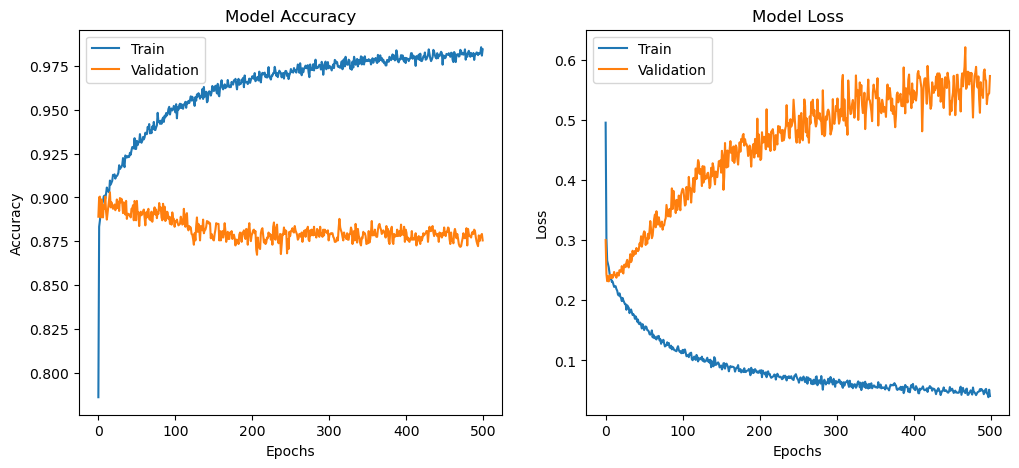

In [64]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=2)
print('\nTest accuracy:', test_acc)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
